/tmp/ipykernel_321242/2705006748.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, ['IPS', 'Memory Throughput']] = scaler.fit_transform(df[['IPS', 'Memory Throughput']])


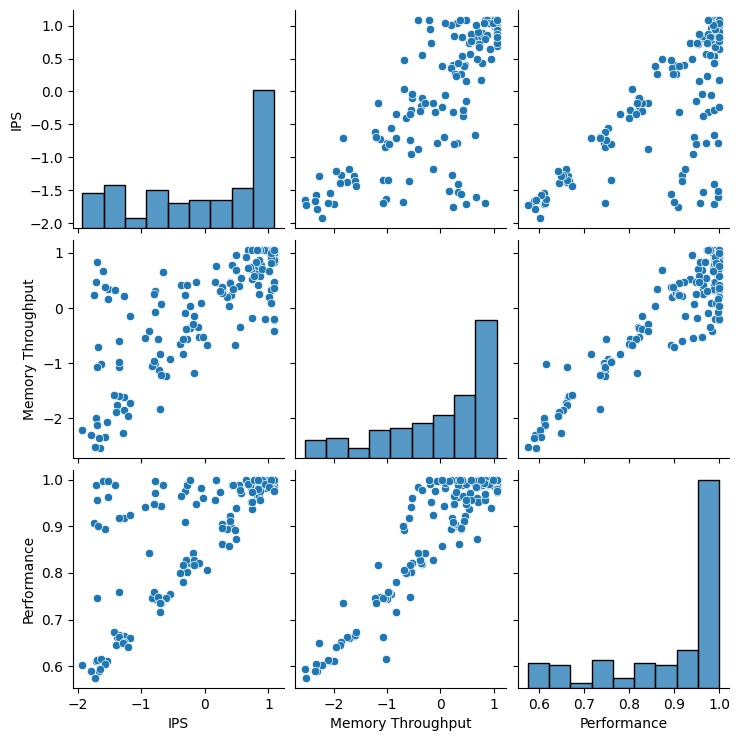

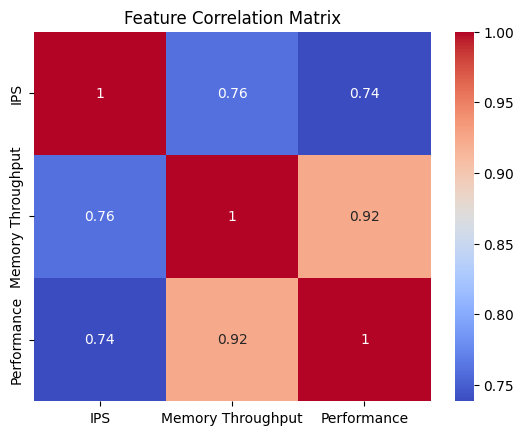

R² Score: 0.9637
Mean Absolute Error: 0.0208


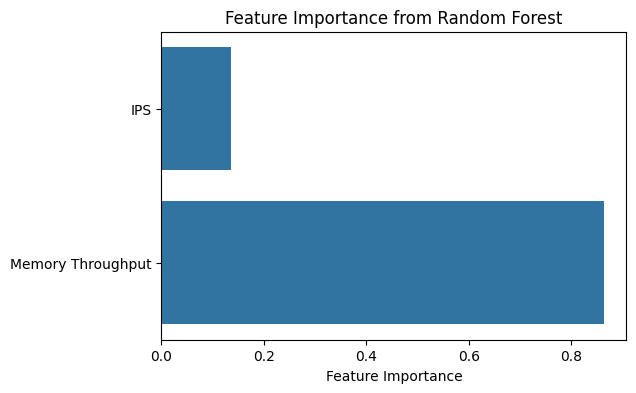

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

def load_csv_files(directory):
    """Load and merge all CSV files from the given directory."""
    all_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.csv')]
    df_list = [pd.read_csv(f) for f in all_files]
    df = pd.concat(df_list, ignore_index=True)
    return df

def preprocess_data(df):
    """Clean and preprocess the dataset."""
    df.dropna(inplace=True)  # Remove missing values
    df = df[['IPS', 'Memory Throughput', 'Performance']]  # Select relevant columns
    scaler = StandardScaler()
    df.loc[:, ['IPS', 'Memory Throughput']] = scaler.fit_transform(df[['IPS', 'Memory Throughput']])
    return df

def feature_analysis(df):
    """Perform correlation analysis and visualization."""
    sns.pairplot(df)
    plt.show()
    
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title("Feature Correlation Matrix")
    plt.show()

def train_model(df):
    """Train a Random Forest model to analyze feature importance."""
    X = df[['IPS', 'Memory Throughput']]
    y = df['Performance']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f'R² Score: {r2:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    
    feature_importance = model.feature_importances_
    feature_names = ['IPS', 'Memory Throughput']
    
    plt.figure(figsize=(6, 4))
    sns.barplot(x=feature_importance, y=feature_names)
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance from Random Forest")
    plt.show()

def main(directory):
    df = load_csv_files(directory)
    df = preprocess_data(df)
    feature_analysis(df)
    train_model(df)

if __name__ == "__main__":
    data_directory = "./altis_power_cap_res/cpu_cap/"  # Change this to your directory path
    main(data_directory)
